Name: Adnan Shaikh<br>
Division: B<br>
Roll No: 28<br>
College: Keystone School of Engineering<br>

# Data Encoding

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("C:\AdnanData\projects\codingResources\datasets\student.csv")
df

,roll,name,class,marks,age
0,1,anil,TE,56.77,22
1,2,amit,TE,59.77,21
2,3,aniket,BE,76.88,19
3,4,ajinkya,TE,69.66,20
4,5,asha,TE,63.28,20
5,6,ayesha,BE,49.55,20
6,7,amar,BE,65.34,19
7,8,amita,BE,68.33,23
8,9,amol,TE,56.75,20
9,10,anmol,BE,78.66,21


### Label/Ordinal Encoding

In [59]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [60]:
#the numbers to the names are assigned on alphabetical order
df['name'] = le.fit_transform(df['name'])
df

,roll,name,class,marks,age
0,1,6,TE,56.77,22
1,2,2,TE,59.77,21
2,3,5,BE,76.88,19
3,4,0,TE,69.66,20
4,5,8,TE,63.28,20
5,6,9,BE,49.55,20
6,7,1,BE,65.34,19
7,8,3,BE,68.33,23
8,9,4,TE,56.75,20
9,10,7,BE,78.66,21


In [61]:
#name becomes data of integer type
df.dtypes

roll       int64
name       int32
class     object
marks    float64
age        int64
dtype: object

In [62]:
#returns the recently fit data
le.classes_

array(['ajinkya', 'amar', 'amit', 'amita', 'amol', 'aniket', 'anil',
       'anmol', 'asha', 'ayesha'], dtype=object)

In [63]:
 le.inverse_transform([6])

array(['anil'], dtype=object)

### One Hot Encoding

In [64]:
pd.get_dummies(df)

,roll,name,marks,age,class_BE,class_TE
0,1,6,56.77,22,False,True
1,2,2,59.77,21,False,True
2,3,5,76.88,19,True,False
3,4,0,69.66,20,False,True
4,5,8,63.28,20,False,True
5,6,9,49.55,20,True,False
6,7,1,65.34,19,True,False
7,8,3,68.33,23,True,False
8,9,4,56.75,20,False,True
9,10,7,78.66,21,True,False


### Binarization

In [67]:
#loading again to reset the database to orignal
df = pd.read_csv("C:\AdnanData\projects\codingResources\datasets\student.csv")
df['marks']

0    56.77
1    59.77
2    76.88
3    69.66
4    63.28
5    49.55
6    65.34
7    68.33
8    56.75
9    78.66
Name: marks, dtype: float64

In [71]:
from sklearn.preprocessing import Binarizer
bin = Binarizer(threshold=60)
bin

Binarizer(threshold=60)

In [74]:
#threshold is 60, so marks above 60 are first class
#threshold is not inclusive, i.e someone with 60 marks will not be first class
df ['firstclass'] = bin.fit_transform(df[['marks']])
df

,roll,name,class,marks,age,firstclass
0,1,anil,TE,56.77,22,0.0
1,2,amit,TE,59.77,21,0.0
2,3,aniket,BE,76.88,19,1.0
3,4,ajinkya,TE,69.66,20,1.0
4,5,asha,TE,63.28,20,1.0
5,6,ayesha,BE,49.55,20,0.0
6,7,amar,BE,65.34,19,1.0
7,8,amita,BE,68.33,23,1.0
8,9,amol,TE,56.75,20,0.0
9,10,anmol,BE,78.66,21,1.0


In [77]:
#converting to int to save space
df['firstclass'] = df['firstclass'].astype(int)
df

,roll,name,class,marks,age,firstclass
0,1,anil,TE,56.77,22,0
1,2,amit,TE,59.77,21,0
2,3,aniket,BE,76.88,19,1
3,4,ajinkya,TE,69.66,20,1
4,5,asha,TE,63.28,20,1
5,6,ayesha,BE,49.55,20,0
6,7,amar,BE,65.34,19,1
7,8,amita,BE,68.33,23,1
8,9,amol,TE,56.75,20,0
9,10,anmol,BE,78.66,21,1


# Normalization

### Normalization using Explicit Function Definition

In [79]:
temp = np.array([11, 45, 23, 17, 21, 15, 7, 33])

def normfunc (x):
    #min max scaling formula for normalisation
    normval = (x - x.min()) / (x.max()-x.min())
    return normval

In [83]:
#max becomes 1, minimum becomes 0
newtemp = normfunc(temp)
newtemp

array([0.10526316, 1.        , 0.42105263, 0.26315789, 0.36842105,
       0.21052632, 0.        , 0.68421053])

Text(0.5, 1.0, 'Normalized Data')

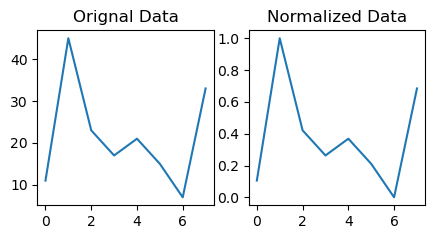

In [95]:
plt.figure(figsize = (5,5))
plt.subplot(2,2, 1)
plt.plot(temp)
plt.title('Orignal Data')
plt.subplot(2, 2, 2)
plt.plot(newtemp)
plt.title('Normalized Data')

In [98]:
temp1 = np.array([678, 545, 376, 487, 523, 856, 465, 378, 366, 754, 734])
newtemp1 = normfunc(temp1)
newtemp1

array([0.63673469, 0.36530612, 0.02040816, 0.24693878, 0.32040816,
       1.        , 0.20204082, 0.0244898 , 0.        , 0.79183673,
       0.75102041])

### Min Max Scaler Normalizing

Importing required dataset

In [100]:
df = pd.read_csv("C:\AdnanData\projects\codingResources\datasets\Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
...,...,...,...,...,...
395,15691863,Female,46.0,41000.0,1
396,15706071,Male,51.0,23000.0,1
397,15654296,Female,50.0,20000.0,1
398,15755018,Male,36.0,33000.0,0


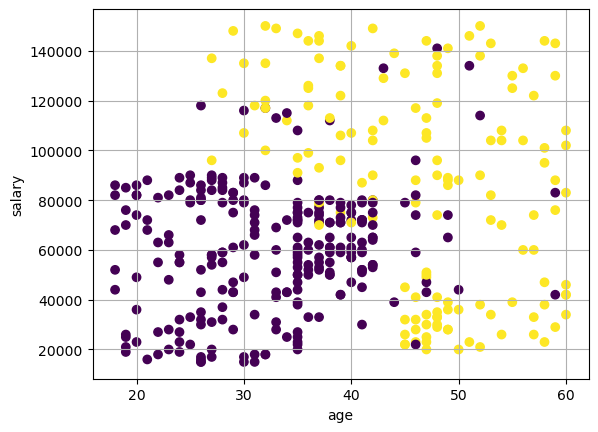

In [109]:
x = df[['Age', 'EstimatedSalary']]
y = df['Purchased']

plt.xlabel('age')
plt.ylabel('salary')
plt.grid()

#color using c on the basis of y
plt.scatter(x['Age'], x['EstimatedSalary'], c=y)

In [106]:
x.describe()

,Age,EstimatedSalary
count,400.000000,400.000000
mean,37.655000,69742.500000
std,10.482877,34096.960282
min,18.000000,15000.000000
25%,29.750000,43000.000000
50%,37.000000,70000.000000
75%,46.000000,88000.000000
max,60.000000,150000.000000


In [115]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
mmscaled = scaler.fit_transform(x)
mmscaled

array([[0.02380952, 0.02962963],
       [0.4047619 , 0.03703704],
       [0.19047619, 0.20740741],
       [0.21428571, 0.31111111],
       [0.02380952, 0.45185185],
       [0.21428571, 0.31851852],
       [0.21428571, 0.51111111],
       [0.33333333, 1.        ],
       [0.16666667, 0.13333333],
       [0.4047619 , 0.37037037],
       [0.19047619, 0.48148148],
       [0.19047619, 0.27407407],
       [0.04761905, 0.52592593],
       [0.33333333, 0.02222222],
       [0.        , 0.4962963 ],
       [0.26190476, 0.48148148],
       [0.69047619, 0.07407407],
       [0.64285714, 0.08148148],
       [0.66666667, 0.0962963 ],
       [0.71428571, 0.1037037 ],
       [0.64285714, 0.05185185],
       [0.69047619, 0.25185185],
       [0.71428571, 0.19259259],
       [0.64285714, 0.05185185],
       [0.66666667, 0.05925926],
       [0.69047619, 0.03703704],
       [0.73809524, 0.0962963 ],
       [0.69047619, 0.11111111],
       [0.26190476, 0.20740741],
       [0.30952381, 0.02222222],
       [0.

In [117]:
sclddf = pd.DataFrame(mmscaled, columns=x.columns)
sclddf

,Age,EstimatedSalary
0,0.023810,0.029630
1,0.404762,0.037037
2,0.190476,0.207407
3,0.214286,0.311111
4,0.023810,0.451852
...,...,...
395,0.666667,0.192593
396,0.785714,0.059259
397,0.761905,0.037037
398,0.428571,0.133333


In [118]:
sclddf.describe()

,Age,EstimatedSalary
count,400.000000,400.000000
mean,0.467976,0.405500
std,0.249592,0.252570
min,0.000000,0.000000
25%,0.279762,0.207407
50%,0.452381,0.407407
75%,0.666667,0.540741
max,1.000000,1.000000


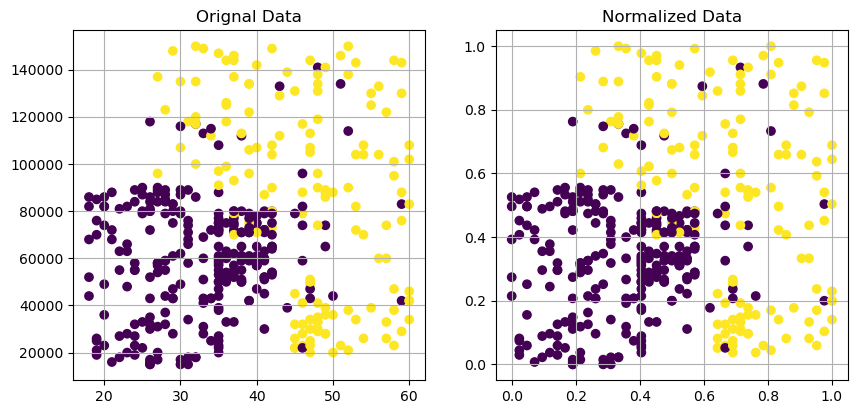

In [128]:
plt.figure(figsize = (10 ,10))
plt.subplot(2,2, 1)
plt.scatter(x['Age'], x['EstimatedSalary'], c=y)
plt.title('Orignal Data')
plt.grid()
plt.subplot(2, 2, 2)
plt.scatter(sclddf['Age'], sclddf['EstimatedSalary'], c=y)
plt.title('Normalized Data')
plt.grid()

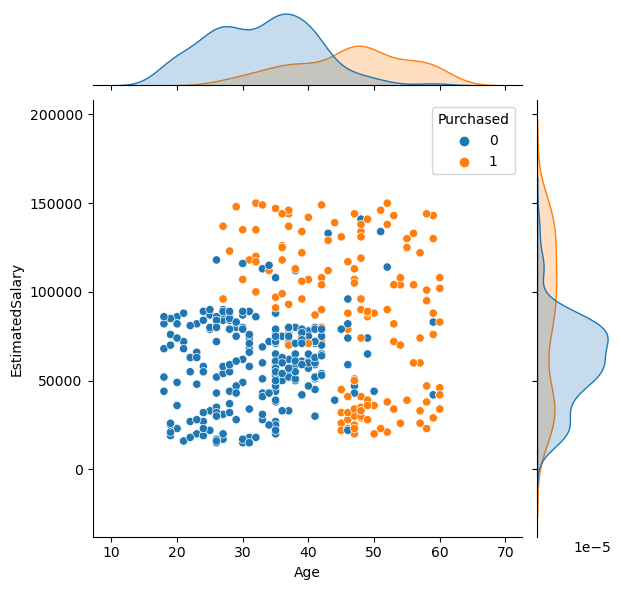

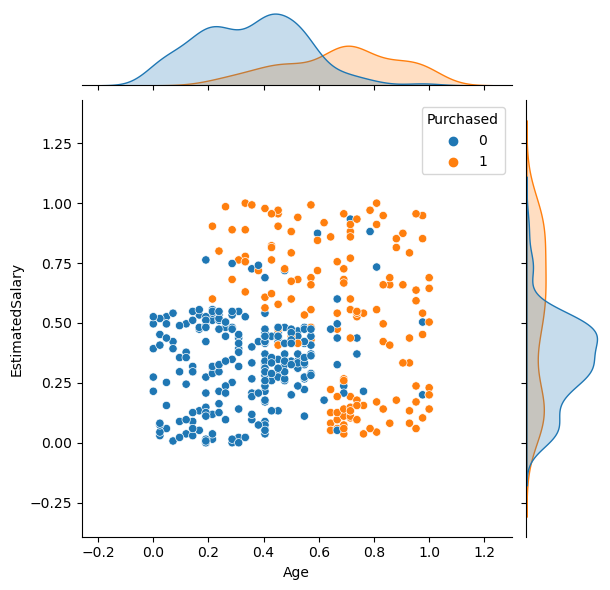

In [131]:
import seaborn as sns

sns.jointplot(x='Age', y='EstimatedSalary', data=df, hue='Purchased')

#as there was c, there is hue here
sns.jointplot(x='Age', y='EstimatedSalary', data=sclddf, hue=y)